In [31]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [79]:
import pandas as pd
import nltk

# Load the dataset
file_path = "new.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(file_path, sheet_name="Sheet2")

# Display the first few rows of the dataset
print(df.head())



                                          Phone Name  \
0  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
1  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
2  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
3  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   
4  Wingtech Visible Midnight (WTVIS01) 32GB - Gra...   

                                            Comments Sentiment  
0  Really impressed with the screen quality and s...  Positive  
1  Really impressed with the screen quality and s...  Positive  
2  Having problems with Wingtech Visible Midnight...  Negative  
3          No issues so far, feels almost brand new!  Positive  
4  Battery life is excellent, and performance is ...  Positive  


In [37]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [41]:
def analyze_sentiment(review):
    # Get the sentiment scores
    scores = sid.polarity_scores(str(review))
    
    # Use the compound score to classify the sentiment
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [43]:
# Apply the sentiment analysis function
df['Sentiment'] = df['Comments'].apply(analyze_sentiment)

# Display a sample of the classified data
print(df[['Comments', 'Sentiment']].head())


                                            Comments Sentiment
0  Really impressed with the screen quality and s...  Positive
1  Really impressed with the screen quality and s...  Positive
2  Having problems with Wingtech Visible Midnight...  Negative
3          No issues so far, feels almost brand new!  Negative
4  Battery life is excellent, and performance is ...  Positive


In [45]:
total_reviews = len(df)
print(f"Total reviews (including empty ones): {total_reviews}")

# If you want to count only non-empty reviews:
non_empty_reviews = df['Comments'].dropna().shape[0]
print(f"Total non-empty reviews: {non_empty_reviews}")

Total reviews (including empty ones): 28351
Total non-empty reviews: 28351


Sentiment
Positive    12541
Neutral     10855
Negative     4955
Name: count, dtype: int64


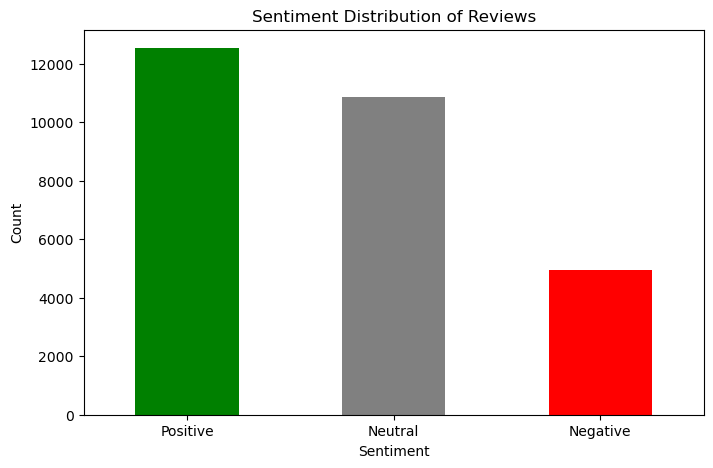

In [49]:
# Get the count of each sentiment type
sentiment_counts = df['Sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

# Optional: Plot the distribution of sentiments
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [55]:
!pip install vaderSentiment



   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------------- ------------------- 61.4/126.0 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [87]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset and specify the sheet with reviews
file_path = 'test.xlsx'  # Update to your file path
sheet2_data = pd.read_excel(file_path, sheet_name='Sheet2')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiment based on VADER's compound score
def classify_sentiment(text):
    scores = analyzer.polarity_scores(str(text))
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification to each review
sheet2_data['Sentiment'] = sheet2_data['Comments'].apply(classify_sentiment)

# Count the number of each sentiment
sentiment_counts = sheet2_data['Sentiment'].value_counts()

# Display results
print("Sentiment Counts:")
print(sentiment_counts)

# If you want to access individual counts for each sentiment
positive_count = sentiment_counts.get('positive', 0)
neutral_count = sentiment_counts.get('neutral', 0)
negative_count = sentiment_counts.get('negative', 0)

print("\nNumber of Positive Sentiments:", positive_count)
print("Number of Neutral Sentiments:", neutral_count)
print("Number of Negative Sentiments:", negative_count)



Sentiment Counts:
Sentiment
positive    14056
neutral     10611
negative     3684
Name: count, dtype: int64

Number of Positive Sentiments: 14056
Number of Neutral Sentiments: 10611
Number of Negative Sentiments: 3684


In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load the dataset
file_path = 'new.xlsx'
df_reviews = pd.read_excel(file_path, sheet_name='Sheet2')  # Replace with correct sheet name if different

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Custom thresholds (you can adjust these)
positive_threshold = 0.2
negative_threshold = -0.2

# Lists to store sentiment labels
sentiment_labels = []

# Analyze each review and classify based on custom thresholds
for review in df_reviews['Comments']:  # Replace 'reviews' with the actual column name for reviews if different
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']
    
    # Custom classification
    if compound_score >= positive_threshold:
        sentiment_labels.append('Positive')
    elif compound_score <= negative_threshold:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

# Add sentiment labels to DataFrame
df_reviews['Sentiment'] = sentiment_labels

# Count the occurrences of each sentiment
positive_count = sentiment_labels.count('Positive')
neutral_count = sentiment_labels.count('Neutral')
negative_count = sentiment_labels.count('Negative')

print(f"Number of Positive Sentiments: {positive_count}")
print(f"Number of Neutral Sentiments: {neutral_count}")
print(f"Number of Negative Sentiments: {negative_count}")


Number of Positive Sentiments: 12443
Number of Neutral Sentiments: 12011
Number of Negative Sentiments: 3897


In [91]:
from textblob import TextBlob
import pandas as pd

# Load the dataset
file_path = 'new.xlsx'  # update with your file path if different
df_reviews = pd.read_excel(file_path, sheet_name='Sheet2')  # Assuming reviews are in Sheet2

# Define thresholds for sentiment classification
positive_threshold = 0.1
negative_threshold = -0.1

# Function to classify sentiments using TextBlob
def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Get the polarity score
    if polarity > positive_threshold:
        return 'Positive'
    elif polarity < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the reviews
df_reviews['Sentiment'] = df_reviews['Comments'].astype(str).apply(classify_sentiment)

# Count the number of each sentiment type
positive_count = (df_reviews['Sentiment'] == 'Positive').sum()
neutral_count = (df_reviews['Sentiment'] == 'Neutral').sum()
negative_count = (df_reviews['Sentiment'] == 'Negative').sum()

# Print the results
print("Number of Positive Sentiments:", positive_count)
print("Number of Neutral Sentiments:", neutral_count)
print("Number of Negative Sentiments:", negative_count)


Number of Positive Sentiments: 16995
Number of Neutral Sentiments: 6273
Number of Negative Sentiments: 5083


In [75]:
# Define stricter thresholds for sentiment classification
positive_threshold = 0.2  # Increase threshold for positive
negative_threshold = -0.2  # Decrease threshold for negative

def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > positive_threshold:
        return 'Positive'
    elif polarity < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the reviews with stricter thresholds
df_reviews['Sentiment'] = df_reviews['Comments'].astype(str).apply(classify_sentiment)

# Recount the sentiments
positive_count = (df_reviews['Sentiment'] == 'Positive').sum()
neutral_count = (df_reviews['Sentiment'] == 'Neutral').sum()
negative_count = (df_reviews['Sentiment'] == 'Negative').sum()

# Print the refined results
print("Number of Positive Sentiments:", positive_count)
print("Number of Neutral Sentiments:", neutral_count)
print("Number of Negative Sentiments:", negative_count)


Number of Positive Sentiments: 14072
Number of Neutral Sentiments: 14250
Number of Negative Sentiments: 29


In [93]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
import pandas as pd

# Load the dataset from Sheet2
file_path = 'test.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet2')


# Function to categorize sentiment based on polarity score
def categorize_sentiment(comment):
    analysis = TextBlob(comment)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
data['Calculated_Sentiment'] = data['Comments'].apply(categorize_sentiment)

# Count the new sentiment distribution based on the re-calculated sentiments
new_sentiment_distribution = data['Calculated_Sentiment'].value_counts()

# Display the counts
print("New sentiment distribution based on re-calculated sentiments:")
print(new_sentiment_distribution)


New sentiment distribution based on re-calculated sentiments:
Calculated_Sentiment
Positive    16014
Neutral      6805
Negative     5532
Name: count, dtype: int64


In [83]:
import pandas as pd

# Load the dataset
file_path = 'new.xlsx'
data = pd.read_excel(file_path)

# Display column names to verify
print("Column names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['Phone Name', 'Price(in $)', 'Rating', 'RAM', 'Storage', 'Screen',
       'Camera', 'Operating System', 'Processor', 'Connectivity', 'Brand'],
      dtype='object')


In [97]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'test2.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet2')

# Function to categorize sentiment based on polarity score
def categorize_sentiment(comment):
    analysis = TextBlob(comment)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
data['Calculated_Sentiment'] = data['Comments'].apply(categorize_sentiment)

# Count the sentiment distribution
sentiment_distribution = data['Calculated_Sentiment'].value_counts()

# Display the sentiment counts
print("Sentiment distribution calculated from Comments:")
print(sentiment_distribution)


Sentiment distribution calculated from Comments:
Calculated_Sentiment
Positive    17815
Neutral      5453
Negative     5083
Name: count, dtype: int64
